#### Importing necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

#### Load dataset from a CSV file

In [41]:
data = pd.read_csv(r"C:/Users/samee/Downloads/creditcard.csv")
data.head(3) # Seeing top rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [42]:
data.isnull().sum() / len(data) * 100 # Checking missing values

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

#### Managing different Data types

In [50]:
data['Class'] = data['Class'].astype('category')
data['Class'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

#### Defining a custom analysis function

In [49]:
def analyze_data(df):
    return {
        'mean': df.mean(numeric_only=True),
        'median': df.median(numeric_only=True),
        'count': df.count(numeric_only=True),
        'std_dev': df.std(numeric_only=True)
    }
analysis_results = analyze_data(data)
analysis_results

{'mean': Time      9.481386e+04
 V1        3.919560e-15
 V2        5.688174e-16
 V3       -8.769071e-15
 V4        2.782312e-15
 V5       -1.552563e-15
 V6        2.010663e-15
 V7       -1.694249e-15
 V8       -1.927028e-16
 V9       -3.137024e-15
 V10       1.768627e-15
 V11       9.170318e-16
 V12      -1.810658e-15
 V13       1.693438e-15
 V14       1.479045e-15
 V15       3.482336e-15
 V16       1.392007e-15
 V17      -7.528491e-16
 V18       4.328772e-16
 V19       9.049732e-16
 V20       5.085503e-16
 V21       1.537294e-16
 V22       7.959909e-16
 V23       5.367590e-16
 V24       4.458112e-15
 V25       1.453003e-15
 V26       1.699104e-15
 V27      -3.660161e-16
 V28      -1.206049e-16
 Amount    8.834962e+01
 dtype: float64,
 'median': Time      84692.000000
 V1            0.018109
 V2            0.065486
 V3            0.179846
 V4           -0.019847
 V5           -0.054336
 V6           -0.274187
 V7            0.040103
 V8            0.022358
 V9           -0.051429
 V10 

#### Data Visualization

In [44]:
# Checking imbalance of Target variable
print('Not Fraud:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Not Fraud: 99.83 % of the dataset
Fraud: 0.17 % of the dataset


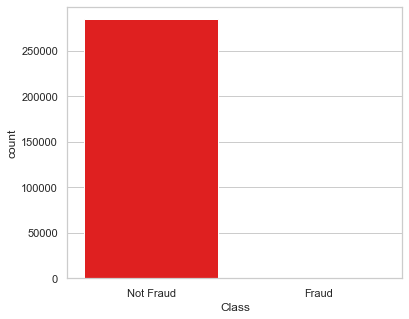

In [56]:
plt.figure(figsize = (6,5))
sns.countplot(data.Class, color = "red")
# Renaming the classes
new_labels = ['Not Fraud', 'Fraud']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.show()

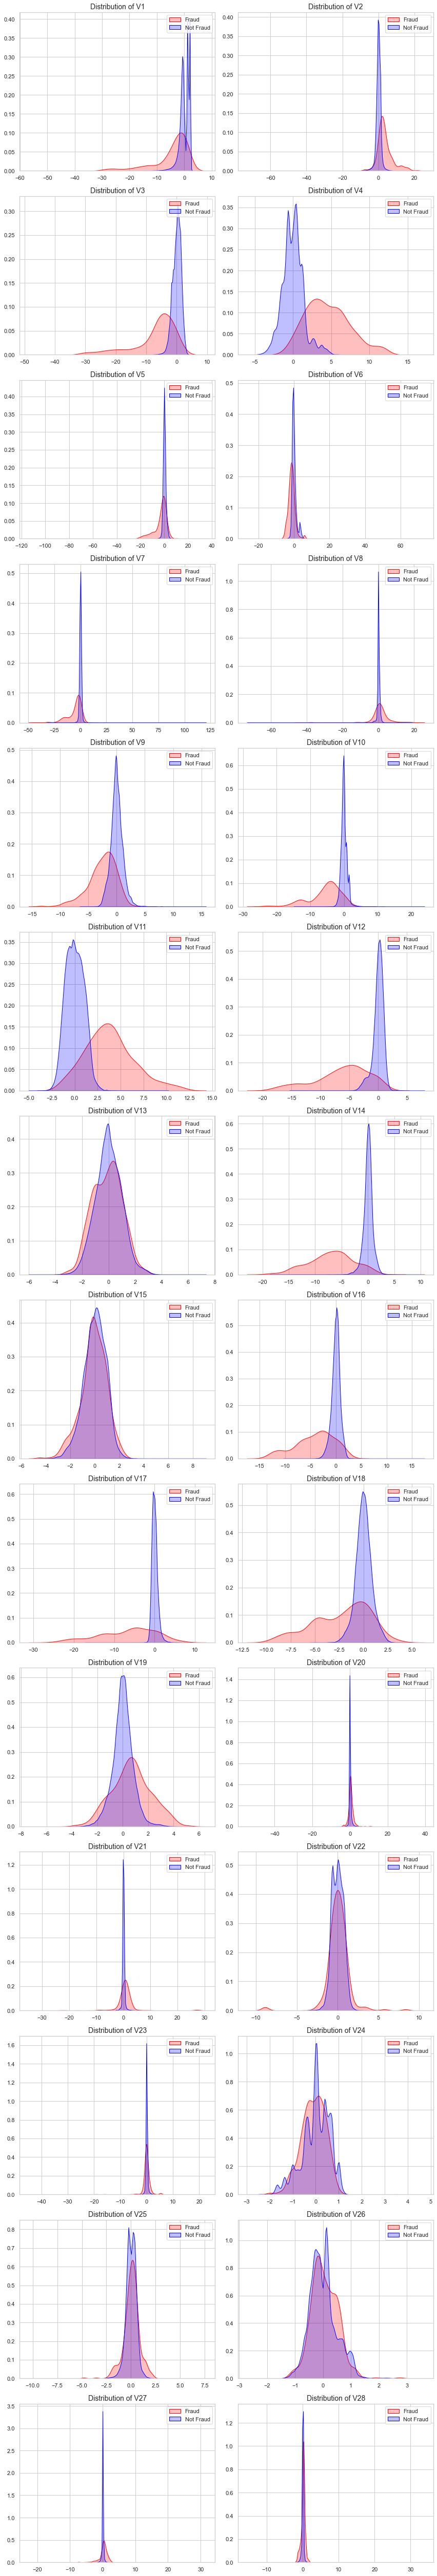

In [58]:
num_features = 28
num_cols = 2
num_rows = num_features // num_cols + (num_features % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten() # Flattening the axes array for easy indexing
for i in range(1, num_features + 1): # Plotting distributions for each of V1 to V28 variables, class wise and renaming the class
    feature = f'V{i}'
    sns.kdeplot(data[data.Class == 1][feature], ax=axes[i - 1], color='red', label='Fraud', fill=True)
    sns.kdeplot(data[data.Class == 0][feature], ax=axes[i - 1], color='blue', label='Not Fraud', fill=True)
    axes[i - 1].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i - 1].set_xlabel('')
    axes[i - 1].set_ylabel('')
    axes[i - 1].legend()
plt.tight_layout() # Adjusting layout 
plt.show()

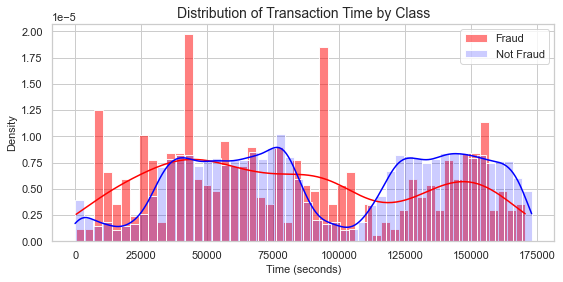

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 4))

# Plotting distribution of 'Time' for Fraud transactions
sns.histplot(data[data.Class == 1]['Time'], bins=50, kde=True, color='red', stat='density', alpha=0.5, label='Fraud')
# Plotting distribution of 'Time' for Not Fraud transactions
sns.histplot(data[data.Class == 0]['Time'], bins=50, kde=True, color='blue', stat='density', alpha=0.2, label='Not Fraud')

plt.title('Distribution of Transaction Time by Class', fontsize =14)
plt.xlabel('Time (seconds)', fontsize = 11)
plt.ylabel('Density', fontsize = 11)
plt.legend()
plt.show()